# Import Library

In [1]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression


# Cross validation
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

# Load the Data

In [3]:
colorectal_df = pd.read_csv('../../../DEG/New/colorectal_ml_data_lfc.csv')

In [4]:
colorectal_df

,11728232_a_at,11735833_a_at,11719434_a_at,11728234_a_at,11739128_a_at,11732838_at,11715637_a_at,11721993_at,11733581_a_at,11750604_a_at,...,11760258_x_at,11718132_at,11720251_at,11724799_x_at,11746772_a_at,11757733_s_at,11757857_s_at,11756083_x_at,11715316_x_at,sample_type
0,3.961224,3.525653,4.091227,3.811626,3.549324,11.535893,12.238765,4.841666,7.829440,4.656073,...,6.741569,5.068841,5.715088,9.303970,6.956112,3.057794,2.083697,8.287012,2.536826,Mucosa
1,4.150849,3.231274,3.652125,2.910643,3.860969,9.388012,12.426268,3.920922,7.616622,4.646544,...,7.085075,4.504109,5.510958,6.470764,5.920584,8.721529,7.232058,9.029117,10.496182,Mucosa
2,2.915041,3.344269,4.736746,2.556401,5.618344,11.352166,12.378740,5.376771,6.990490,5.228995,...,7.939907,8.502685,6.735144,8.697731,10.182467,10.466810,9.071230,2.764370,2.954533,Mucosa
3,4.619689,3.758475,3.861172,3.595169,3.974721,10.968717,12.480088,4.561874,6.908015,4.668323,...,7.004064,4.596727,5.208766,4.885240,7.476517,3.048054,2.269150,7.833188,9.360527,Mucosa
4,4.173030,3.124475,4.084866,2.952316,4.199110,10.728334,12.545863,4.664203,7.205106,4.689223,...,6.957954,5.230019,3.299203,8.718398,9.411712,9.604081,7.674544,7.982482,3.562634,Mucosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,8.333105,6.619276,6.593062,6.638163,8.005932,3.504068,10.144328,8.258466,2.906895,6.224321,...,8.684000,4.942923,8.172055,4.783011,10.513071,2.629745,2.140094,8.722915,10.524183,Tumor
242,9.072294,8.660195,7.103051,7.318572,7.238546,3.182021,10.253128,9.827421,2.881668,7.167934,...,8.174446,5.976072,7.827573,9.847743,10.736953,2.480961,1.999230,1.970573,2.255261,Tumor
243,9.086258,7.229068,5.881465,7.999610,7.137488,2.663260,10.493696,8.703273,2.174059,6.562482,...,3.690160,7.014529,8.492737,6.280359,2.605201,9.853237,8.138803,9.500060,3.098058,Tumor
244,8.579728,7.258460,6.665537,7.643318,8.043958,2.822487,10.722497,7.114207,2.785241,7.222587,...,6.729616,4.434155,7.733066,6.064585,3.279052,2.514426,2.358936,5.148906,2.677845,Tumor


# Separate the Data into Target and Feature Variable

In [5]:
X=colorectal_df.iloc[:,0:-1]
y=colorectal_df.iloc[:,-1]

In [6]:
y

0      Mucosa
1      Mucosa
2      Mucosa
3      Mucosa
4      Mucosa
        ...  
241     Tumor
242     Tumor
243     Tumor
244     Tumor
245     Tumor
Name: sample_type, Length: 246, dtype: object

# Encode Lables

In [7]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [8]:
classes

array([0, 1, 2])

In [9]:
labels

array(['Mucosa', 'Normal', 'Tumor'], dtype=object)

# Data splilting into traning testing and validation sets

In [10]:
# Split data into train, validation, and test sets using stratified sampling
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state = random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train,random_state = random_state)

In [11]:
X_train

,11728232_a_at,11735833_a_at,11719434_a_at,11728234_a_at,11739128_a_at,11732838_at,11715637_a_at,11721993_at,11733581_a_at,11750604_a_at,...,11746954_s_at,11760258_x_at,11718132_at,11720251_at,11724799_x_at,11746772_a_at,11757733_s_at,11757857_s_at,11756083_x_at,11715316_x_at
197,7.797289,8.657750,5.529000,6.334844,8.753693,3.305205,10.311467,8.284614,2.866454,6.700208,...,6.080695,5.045083,4.921582,8.888502,5.022032,9.310744,2.894074,2.168256,9.075279,9.818484
201,9.084894,7.850031,7.010344,6.790167,8.273837,3.655921,10.307853,8.223095,2.822097,7.892033,...,5.443581,7.630364,4.801176,8.119707,5.275026,4.358920,2.665073,2.497180,4.882671,3.005642
244,8.579728,7.258460,6.665537,7.643318,8.043958,2.822487,10.722497,7.114207,2.785241,7.222587,...,7.120815,6.729616,4.434155,7.733066,6.064585,3.279052,2.514426,2.358936,5.148906,2.677845
1,4.150849,3.231274,3.652125,2.910643,3.860969,9.388012,12.426268,3.920922,7.616622,4.646544,...,3.625949,7.085075,4.504109,5.510958,6.470764,5.920584,8.721529,7.232058,9.029117,10.496182
193,7.972969,9.186005,8.505547,6.659749,7.839987,3.013364,10.467159,8.180332,3.085692,8.251122,...,2.911480,2.879531,2.988148,9.880858,7.033530,2.381567,3.177422,2.920934,2.153887,2.650424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,8.723016,7.354809,7.717315,7.329348,7.524983,3.261232,10.609555,7.419988,2.618752,6.394095,...,5.260981,9.090034,4.967147,7.106459,4.587652,12.458564,2.597004,2.100963,8.062830,3.083489
241,8.333105,6.619276,6.593062,6.638163,8.005932,3.504068,10.144328,8.258466,2.906895,6.224321,...,5.847487,8.684000,4.942923,8.172055,4.783011,10.513071,2.629745,2.140094,8.722915,10.524183
159,8.159823,9.739355,7.506296,6.282101,8.678580,2.781816,10.446509,8.524104,2.970882,7.078129,...,4.015561,5.043604,4.805392,3.198002,5.340898,6.685070,2.329299,2.599321,4.870298,3.641333
166,8.722603,5.988202,6.014926,6.494509,6.334723,6.951741,11.907275,6.745460,3.759767,5.977971,...,3.826198,7.130622,5.464048,5.335154,9.583354,10.431166,2.988668,2.297318,2.218094,10.528625


In [12]:
y_train

array([2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0,
       1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2,
       0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2])

In [13]:
# Standardize the data using Z-score normalization
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
X_val_norm = scaler.transform(X_val)

In [14]:
X_train_norm

array([[ 0.7414047 ,  1.33695498,  0.20063   , ..., -0.75837937,
         1.40209337,  1.35875964],
       [ 1.24777154,  1.01400903,  1.09309159, ..., -0.64934201,
        -0.00191783, -0.61570294],
       [ 1.04910855,  0.77748449,  0.88535667, ..., -0.6951696 ,
         0.08723856, -0.71070343],
       ...,
       [ 0.88397594,  1.76940735,  1.3918866 , ..., -0.61548239,
        -0.0060613 , -0.43147036],
       [ 1.10529591,  0.26960381,  0.49338497, ..., -0.7155957 ,
        -0.89422542,  1.56456934],
       [ 0.95641737,  0.80642106,  1.40241533, ..., -0.70215093,
        -0.95019277, -0.51223269]])

# Feature Selection Methods

In [15]:
# Feature selection using different methods
n_features_to_select = 50  # Number of top features to select

# SelectKBest with ANOVA F-value
selector_f_classif = SelectKBest(f_classif, k=n_features_to_select)
selector_f_classif.fit(X_train_norm, y_train)
selected_features_f_classif = X_train.columns[selector_f_classif.get_support()]

# ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(X_train_norm, y_train)
feature_importances_etc = etc.feature_importances_
selected_features_etc = X_train.columns[feature_importances_etc.argsort()[::-1][:n_features_to_select]]

# Combine the selected features from different methods
selected_features_ensemble = list(set(selected_features_f_classif) | set(selected_features_etc))

# Print the selected features from the ensemble approach
print("Selected Features (Ensemble):", selected_features_ensemble)

# Train the models with the ensemble-selected features
X_train_ensemble = X_train_norm[:, [X_train.columns.get_loc(feat) for feat in selected_features_ensemble]]
X_test_ensemble = X_test_norm[:, [X_test.columns.get_loc(feat) for feat in selected_features_ensemble]]
X_val_ensemble = X_val_norm[:, [X_val.columns.get_loc(feat) for feat in selected_features_ensemble]]

Selected Features (Ensemble): ['11735214_a_at', '11759415_at', '11728234_a_at', '11727553_a_at', '11743172_a_at', '11759464_at', '11743468_at', '11715637_a_at', '11754801_x_at', '11721561_a_at', '11743444_s_at', '11749300_x_at', '11715436_at', '11718816_a_at', '11718414_s_at', '11735833_a_at', '11721441_x_at', '11746931_a_at', '11727088_a_at', '11741499_x_at', '11720106_a_at', '11722783_at', '11719591_s_at', '11723599_a_at', '11737294_a_at', '11720105_a_at', '11715104_s_at', '11720946_at', '11732699_a_at', '11756338_x_at', '11745543_x_at', '11734322_at', '11752940_a_at', '11729583_x_at', '11724537_a_at', '11755219_a_at', '11730881_a_at', '11733581_a_at', '11750604_a_at', '11717822_a_at', '11736163_a_at', '11723826_a_at', '11717833_a_at', '11743655_a_at', '11746928_a_at', '11754874_a_at', '11746142_a_at', '11739128_a_at', '11743657_x_at', '11753601_x_at', '11732519_at', '11744612_a_at', '11730091_at', '11732838_at', '11719434_a_at', '11729751_a_at', '11734320_a_at', '11729582_s_at', '11

# Model Traning

# Random Forest

In [16]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Model Training - Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 50, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_ensemble, y_train)
best_params_rf = grid_search_rf.best_params_
print("Best hyperparameters for Random Forest:", best_params_rf)

rf_clf = RandomForestClassifier(**best_params_rf, random_state=42)
rf_clf.fit(X_train_ensemble, y_train)

# Model Evaluation - Random Forest
y_pred_rf = rf_clf.predict(X_test_ensemble)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest:", accuracy_rf)


Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy of Random Forest: 0.98


Accuracy: 0.98
Balanced Accuracy: 0.98
F1-score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        10
      Normal       0.95      1.00      0.98        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



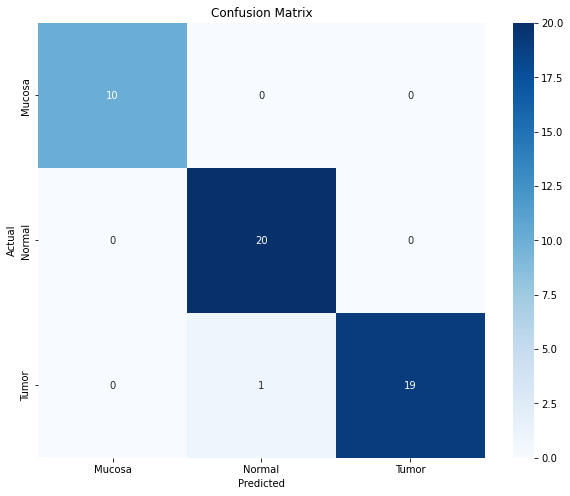

In [17]:

accuracy = accuracy_score(y_test, y_pred_rf)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='macro')
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_rf, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
# Evaluate the model performance on the validation set
# For Random Forest
y_val_pred_rf = rf_clf.predict(X_val_ensemble)
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
print("Accuracy of Random Forest on validation set:", accuracy_val_rf)

Accuracy of Random Forest on validation set: 0.9795918367346939


# Support Vector Machine (SVM)

In [19]:
# Model Training - SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_ensemble, y_train)
best_params_svm = grid_search_svm.best_params_
print("Best hyperparameters for SVM:", best_params_svm)

svm_clf = SVC(**best_params_svm, random_state=42)
svm_clf.fit(X_train_ensemble, y_train)

# Model Evaluation - SVM
y_pred_svm = svm_clf.predict(X_test_ensemble)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM:", accuracy_svm)

Best hyperparameters for SVM: {'C': 1, 'kernel': 'rbf'}
Accuracy of SVM: 0.98


Accuracy: 0.98
Balanced Accuracy: 0.98
F1-score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        10
      Normal       0.95      1.00      0.98        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



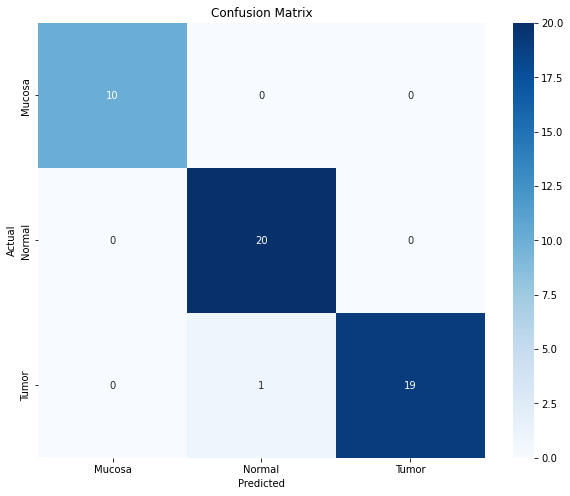

In [20]:

accuracy = accuracy_score(y_test, y_pred_svm)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm, average='macro')
precision = precision_score(y_test, y_pred_svm, average='macro')
recall = recall_score(y_test, y_pred_svm, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_svm, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
# For SVM
y_val_pred_svm = svm_clf.predict(X_val_ensemble)
accuracy_val_svm = accuracy_score(y_val, y_val_pred_svm)
print("Accuracy of SVM on validation set:", accuracy_val_svm)

Accuracy of SVM on validation set: 0.9795918367346939


# Logistic Regression

In [22]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l2']
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_ensemble, y_train)
best_params_lr = grid_search_lr.best_params_
print("Best hyperparameters for Logistic Regression:", best_params_lr)

lr_clf = LogisticRegression(**best_params_lr, random_state=42)
lr_clf.fit(X_train_ensemble, y_train)

Best hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}


LogisticRegression(C=0.1, random_state=42)

Accuracy: 0.98
Balanced Accuracy: 0.98
F1-score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        10
      Normal       0.95      1.00      0.98        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



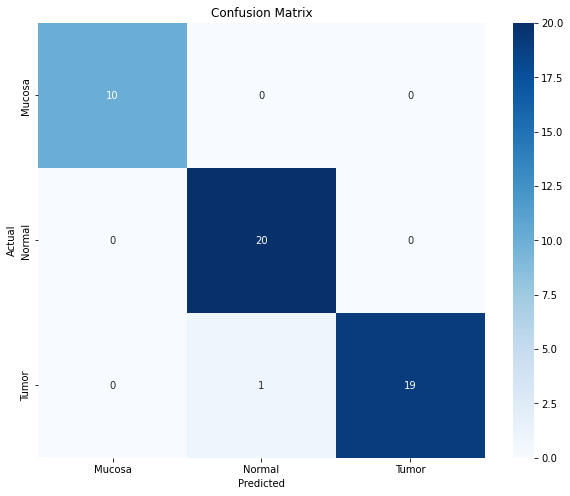

In [23]:
# Evaluate the model performance on the test set
y_pred_lr = lr_clf.predict(X_test_ensemble)

accuracy = accuracy_score(y_test, y_pred_lr)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr, average='macro')
precision = precision_score(y_test, y_pred_lr, average='macro')
recall = recall_score(y_test, y_pred_lr, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_lr, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# For LR
y_val_pred_lr = lr_clf.predict(X_val_ensemble)
accuracy_val_lr = accuracy_score(y_val, y_val_pred_lr)
print("Accuracy of LR on validation set:", accuracy_val_lr)

Accuracy of LR on validation set: 1.0


# KNN

In [25]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_ensemble, y_train)
best_params_knn = grid_search_knn.best_params_
print("Best hyperparameters for KNN:", best_params_knn)

knn_clf = KNeighborsClassifier(**best_params_knn)
knn_clf.fit(X_train_ensemble, y_train)

Best hyperparameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


KNeighborsClassifier(n_neighbors=3)

Accuracy: 0.98
Balanced Accuracy: 0.98
F1-score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        10
      Normal       0.95      1.00      0.98        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



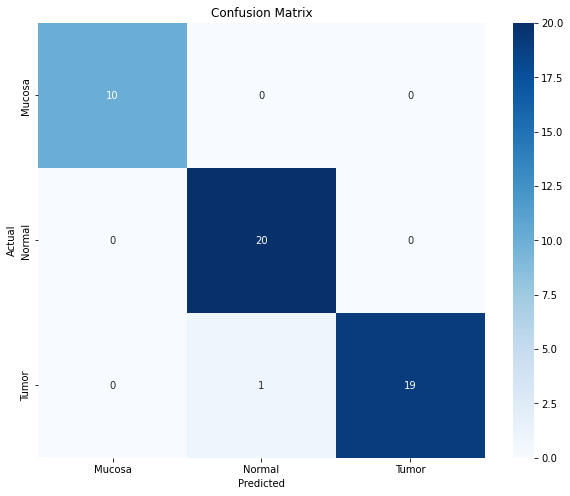

In [26]:
# Evaluate the model performance on the test set
y_pred_knn = knn_clf.predict(X_test_ensemble)

accuracy = accuracy_score(y_test, y_pred_knn)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn, average='macro')
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_knn, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# For KNN
y_val_pred_knn = knn_clf.predict(X_val_ensemble)
accuracy_val_knn = accuracy_score(y_val, y_val_pred_knn)
print("Accuracy of LR on validation set:", accuracy_val_knn)

Accuracy of LR on validation set: 1.0


# XGBoost

In [28]:
# XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_ensemble, y_train)
best_params_xgb = grid_search_xgb.best_params_
print("Best hyperparameters for XGBoost:", best_params_xgb)

xgb_clf = XGBClassifier(**best_params_xgb, random_state=42)
xgb_clf.fit(X_train_ensemble, y_train)

Best hyperparameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy: 1.00
Balanced Accuracy: 1.00
F1-score: 1.00
Precision: 1.00
Recall: 1.00

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        10
      Normal       1.00      1.00      1.00        20
       Tumor       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



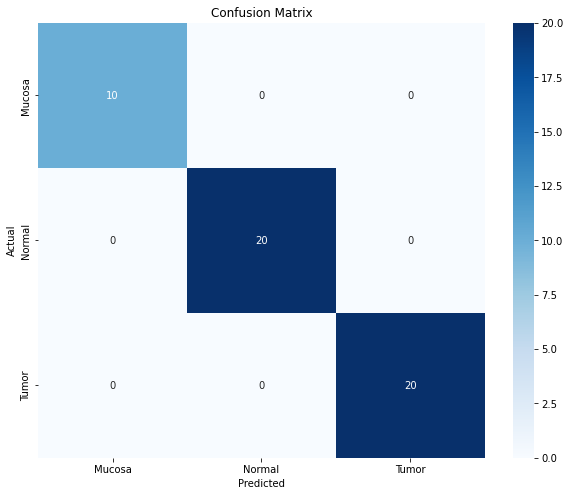

In [29]:
# Evaluate the model performance on the test set
y_pred_xgb = xgb_clf.predict(X_test_ensemble)

accuracy = accuracy_score(y_test, y_pred_xgb)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb, average='macro')
precision = precision_score(y_test, y_pred_xgb, average='macro')
recall = recall_score(y_test, y_pred_xgb, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_xgb, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
# For XGB
y_val_pred_xgb = xgb_clf.predict(X_val_ensemble)
accuracy_val_xgb = accuracy_score(y_val, y_val_pred_xgb)
print("Accuracy of LR on validation set:", accuracy_val_xgb)

Accuracy of LR on validation set: 0.9591836734693877


#  Multi-Layer Perceptron (MLP)

In [31]:
# MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 25)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

grid_search_mlp = GridSearchCV(MLPClassifier(max_iter=300, random_state=42), param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train_ensemble, y_train)
best_params_mlp = grid_search_mlp.best_params_
print("Best hyperparameters for MLP:", best_params_mlp)

mlp_clf = MLPClassifier(**best_params_mlp, max_iter=300, random_state=42)
mlp_clf.fit(X_train_ensemble, y_train)

Best hyperparameters for MLP: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}


MLPClassifier(max_iter=300, random_state=42)

Accuracy: 0.98
Balanced Accuracy: 0.98
F1-score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        10
      Normal       0.95      1.00      0.98        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



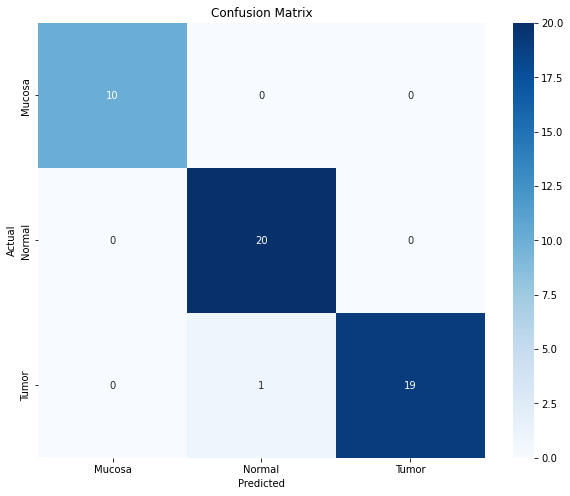

In [32]:
# Evaluate the model performance on the test set
y_pred_mlp = mlp_clf.predict(X_test_ensemble)

accuracy = accuracy_score(y_test, y_pred_mlp)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp, average='macro')
precision = precision_score(y_test, y_pred_mlp, average='macro')
recall = recall_score(y_test, y_pred_mlp, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_mlp, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
# For MLP
y_val_pred_mlp = mlp_clf.predict(X_val_ensemble)
accuracy_val_mlp = accuracy_score(y_val, y_val_pred_mlp)
print("Accuracy of LR on validation set:", accuracy_val_mlp)

Accuracy of LR on validation set: 1.0


# Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score

# Random Forest
rf_scores = cross_val_score(rf_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean Cross-Validation Score: {:.2f}".format(np.mean(rf_scores)))

# SVM 
svm_scores = cross_val_score(svm_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("SVM Cross-Validation Scores:", svm_scores)
print("SVM Mean Cross-Validation Score: {:.2f}".format(np.mean(svm_scores)))

# Logistic Regression
lr_scores = cross_val_score(lr_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:", lr_scores)
print("Logistic Regression Mean Cross-Validation Score: {:.2f}".format(np.mean(lr_scores)))

# KNN
knn_scores = cross_val_score(knn_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("KNN Cross-Validation Scores:", knn_scores)
print("KNN Mean Cross-Validation Score: {:.2f}".format(np.mean(knn_scores)))

# XGBoost
xgb_scores = cross_val_score(xgb_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("XGBoost Cross-Validation Scores:", xgb_scores)
print("XGBoost Mean Cross-Validation Score: {:.2f}".format(np.mean(xgb_scores)))

# MLP
mlp_scores = cross_val_score(mlp_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("MLP Cross-Validation Scores:", mlp_scores)
print("MLP Mean Cross-Validation Score: {:.2f}".format(np.mean(mlp_scores)))

Random Forest Cross-Validation Scores: [1.         0.96666667 1.         1.         1.        ]
Random Forest Mean Cross-Validation Score: 0.99
SVM Cross-Validation Scores: [1.         0.96666667 1.         1.         1.        ]
SVM Mean Cross-Validation Score: 0.99
Logistic Regression Cross-Validation Scores: [1.         0.96666667 1.         1.         1.        ]
Logistic Regression Mean Cross-Validation Score: 0.99
KNN Cross-Validation Scores: [1.         0.96666667 1.         1.         1.        ]
KNN Mean Cross-Validation Score: 0.99
XGBoost Cross-Validation Scores: [1.         0.93333333 0.96551724 1.         0.96551724]
XGBoost Mean Cross-Validation Score: 0.97
MLP Cross-Validation Scores: [1.         0.96666667 1.         1.         1.        ]
MLP Mean Cross-Validation Score: 0.99
